### 数据科学与大数据技术二班 201805750331 许延芳

# python期末实验报告

# 导入csv文件

In [2]:
import pandas as pd
time=pd.read_csv('time.csv')
time

,日期,起床时间,早上离开宿舍时间,晚上回到宿舍时间,上床睡觉时间,晚上睡眠总时长,午睡时长(分钟),是否吃早餐,三餐总时长(分钟),点外卖次数,上课总时间(小时),运动总时间(分钟),自习总时间(分钟),其它时间(休闲娱乐社交社团等)(分钟)
0,2019.11.11,7:00,7:30,22:10,23:30,7.5,40,1,80,0,5.0,0,300,270
1,2019.11.12,7:00,7:35,22:20,23:40,7.2,50,1,90,0,3.5,30,300,300
2,2019.11.13,6:50,7:35,22:30,23:30,7.3,30,1,80,0,7.0,20,180,270
3,2019.11.14,7:30,8:00,22:10,23:30,8.0,30,1,70,0,8.0,20,120,250
4,2019.11.15,7:30,8:00,22:20,23:50,8.0,30,1,80,0,3.0,20,400,250
5,2019.11.16,7:30,8:00,23:15,23:40,7.7,30,1,70,0,0.0,20,660,190
6,2019.11.17,6:50,7:30,21:20,23:40,7.2,30,1,70,1,2.0,20,490,280
7,2019.11.18,7:30,8:00,19:00,23:30,7.7,30,1,70,0,5.0,30,160,330
8,2019.11.19,7:00,7:40,21:40,23:40,7.5,30,1,80,0,3.5,30,420,230
9,2019.11.20,7:10,7:40,21:40,23:40,7.5,30,1,80,0,7.0,20,210,230


# 每天时间饼状图

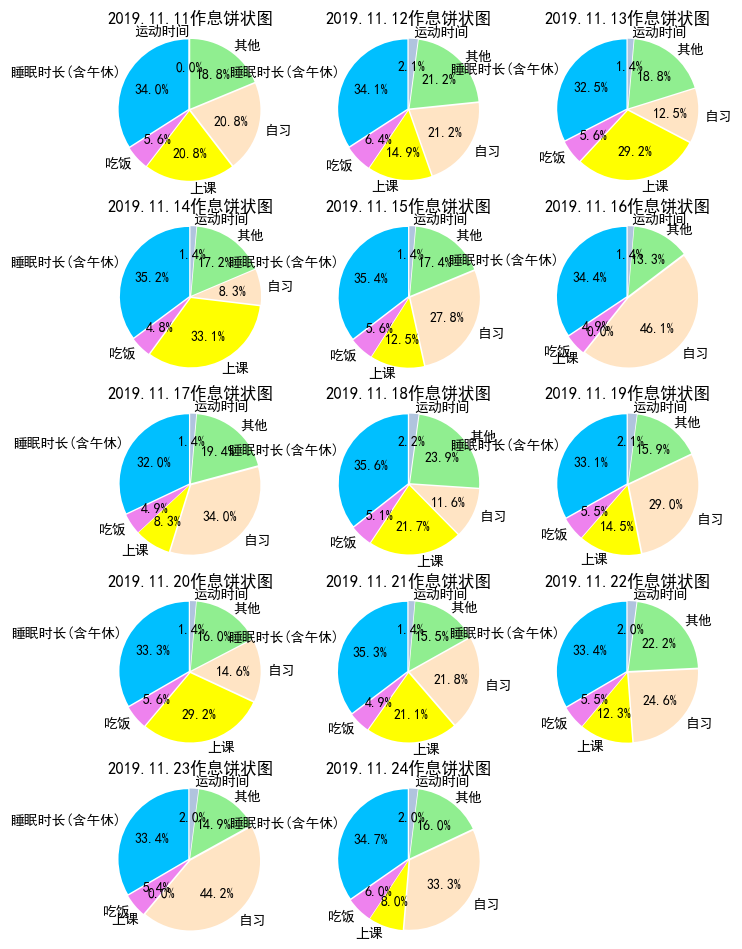

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
#设置画布
plt.figure(figsize=(8,12),dpi=100)
x=len(time.index[:])
sizes=np.empty((x,6))
#导入数据
a = time['晚上睡眠总时长']*60+time['午睡时长(分钟)']
b = time['三餐总时长(分钟)']
c = time['上课总时间(小时)']*60
d = time['自习总时间(分钟)']
e = time['其它时间(休闲娱乐社交社团等)(分钟)']
f = time['运动总时间(分钟)']
#中文字体
font = {'family':'SimHei'}
mpl.rc('font',**font)
#画图
for i in range(len(time.index[:])):
    sizes[i]=[a[i],b[i],c[i],d[i],e[i],f[i]]
    #print(sizes[i])
    plt.subplot(5,3,i+1)
    colors=['deepskyblue','violet','yellow','bisque','lightgreen','lightsteelblue']
    explode=(0.02,0.02,0.02,0.02,0.02,0.02)
    labels=['睡眠时长(含午休)','吃饭','上课','自习','其他','运动时间'] 
    plt.pie(sizes[i],explode=explode,colors=colors,labels=labels,startangle=90,autopct='%3.1f%%')
    plt.axis('equal')
    plt.title(time['日期'][i]+'作息饼状图')

# 每天睡眠总时长(包括午休)线形图

In [1]:
font = {'family':'SimHei'}
mpl.rc('font',**font)
plt.figure(figsize=(8,4),dpi=100)
plt.grid()
a = np.array(time['日期'],dtype=np.str)
x = []
for i in range(14):
    x.append(a[i].split('.')[2])
#x = time['日期']
y = time['晚上睡眠总时长']*60+time['午睡时长(分钟)']
z = [np.mean(y)]*len(x)  #计算平均值
plt.xlabel('日期(2019年11月—号)')
plt.ylabel('分钟')
plt.title('每天睡眠总时长(包括午休)随日期变化线形图',fontsize=15)
plt.plot(x,y,'-o',color='coral',label='每天睡觉总时间')
plt.plot(x,z,'--',color='g',label='自习睡觉时间')
plt.legend()

NameError: name 'mpl' is not defined

# 每天自习时间线形图

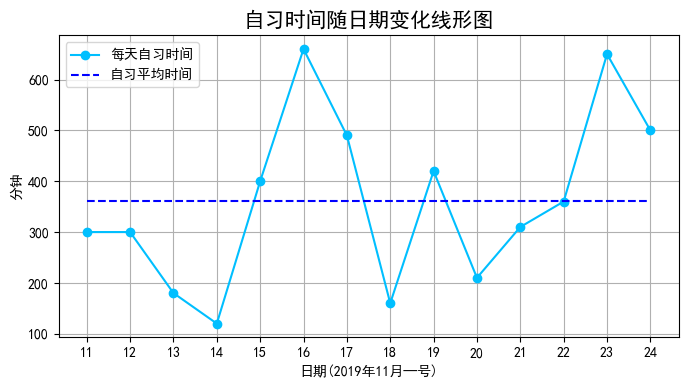

In [5]:
#设置中文字体
font = {'family':'SimHei'}
mpl.rc('font',**font)
plt.figure(figsize=(8,4),dpi=100)
plt.grid()
a = np.array(time['日期'],dtype=np.str)
x = []
for i in range(14):
    x.append(a[i].split('.')[2])
y = time['自习总时间(分钟)']
z = [np.mean(y)]*len(x)  #计算平均值
plt.xlabel('日期(2019年11月—号)')
plt.ylabel('分钟')
plt.title('自习时间随日期变化线形图',fontsize=15)
plt.plot(x,y,'-o',color='deepskyblue',label='每天自习时间')
plt.plot(x,z,'--',color='b',label='自习平均时间')
plt.legend()

# 分析数据和改进方案

+ 分析数据
   1. 每天早起时间基本稳定，离开寝室时间与起床时间相隔半小时左右，洗漱整理时间大多为半小时
   2. 晚上回寝时间大多在10点以后，与上床睡觉时间间隔1小时左右,即晚上回寝之后的整理洗漱娱乐时间大多在1小时
   3. 晚上睡眠时间稳定在8小时左右，整体睡眠时间波动较大，最高达520分钟，最低460分钟，受影响较大，没有严格作息计划
   4. 点外卖次数很少，偶尔一次
   5. 每天都吃了早餐，说明饮食问题较为健康
   6. 运动时间稳定在20、30分钟,时间占比在2%，缺乏运动
   7. 每周的上课时间集中在连续的两天，对应的自习时间较其他日期少
   8. 每天上课时间和自习时间的总和占比几乎一样，上课时间长则自习时间短，上课时间短则自习时间长，说明每天用于学习时间基本一样
   9. 每天其他时间占比差不多，但是上课时间较少的时候其他时间相对较多，说明上课时间少时，浪费在其他事情的时间比较多
   10. 每天睡眠时间占比几乎一样
   11. 平均自习时间在360分钟，但是存在高峰和低峰，最长自习时间达到660分钟，最低只有120分钟，波动幅度大，受影响大
   12. 存在没有课或课很少时，自习时间都达到较大值，是此期间的高峰，并且起床时间都较晚，说明在无课时自习时间更加长，并且贪睡
   13. 午睡时间30分钟以上，并且每天存在
   14. 吃饭时间基本每天的占比都一样，在5%左右
  
***
   
+ 改进方案
   1. 提前睡觉时间和起床时间，做到在23:20上床睡觉，早上6:20起床，形成良好的作息习惯
   2. 晚上回宿舍时间可以按晚上安排适当修改或提前
   3. 午睡时间可以缩短至30分钟以内
   4. 尽量做到不点外卖
   5. 增加运动时间锻炼身体
   6. 自习时间可以按每天的上课情况做出相应改变，在周末也应该多出去走动
   7. 其他时间应该尽可能缩短，不浪费时间在一些娱乐无意义的事情上